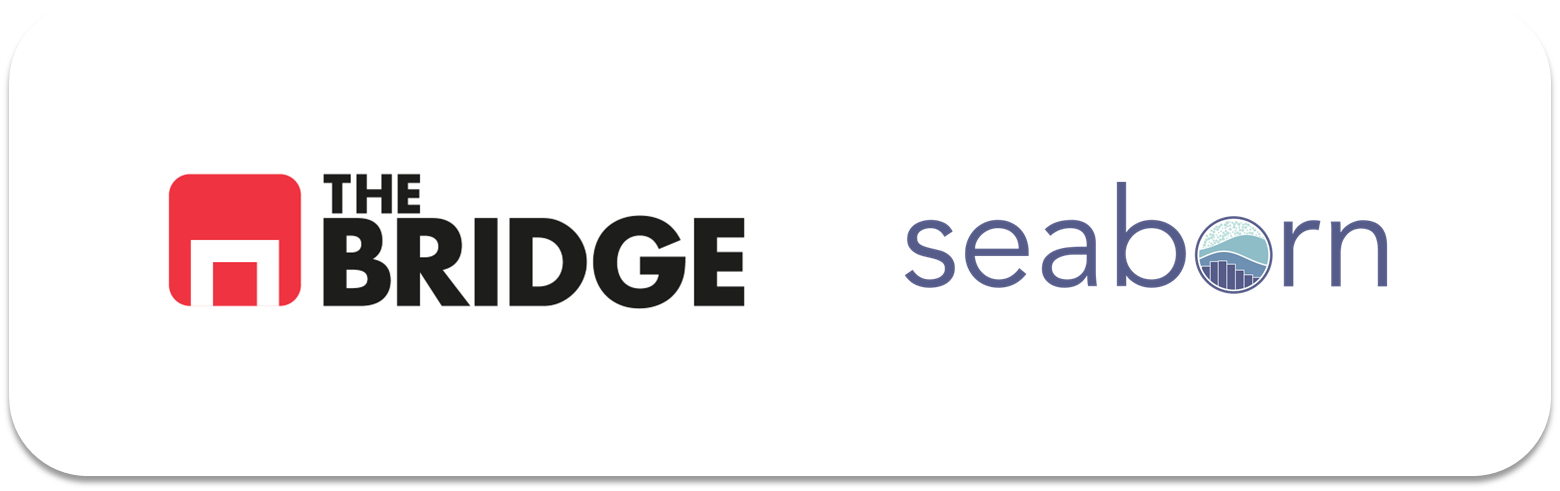

# PRÁCTICA OBLIGATORIA
## Visualización Avanzada y Presentación

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo.
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso.

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.options.mode.copy_on_write = True
sns.set_style("whitegrid")

## Visualización
### 1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [2]:
df_cities = pd.read_csv("./data/california_cities.csv", index_col=0)
df_cities.sample(5)

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
65,Carpinteria,34.399167,-119.516389,10.0,33.0,13040,9.272,2.586,6.686,24.012,6.697,17.315,72.11
75,CitrusHeights,38.700000,-121.283333,50.0,164.0,83301,14.228,14.228,0.000,36.851,36.851,0.000,0.00
165,Guadalupe,34.965556,-120.573056,26.0,85.0,7080,1.314,1.309,0.005,3.405,3.391,0.014,0.40
439,Turlock,37.505833,-120.848889,31.0,102.0,69733,16.928,16.928,0.000,43.844,43.844,0.000,0.00
26,Bakersfield,35.366667,-119.016667,NaN,404.0,347483,143.609,142.164,1.445,371.946,368.204,3.742,1.01


In [3]:
df_cities.isna().sum()

city                   0
latd                   0
longd                  0
elevation_m           48
elevation_ft          12
population_total       0
area_total_sq_mi       2
area_land_sq_mi        0
area_water_sq_mi       1
area_total_km2         5
area_land_km2          4
area_water_km2         4
area_water_percent     5
dtype: int64

In [123]:
df_cities.dropna(inplace=True)
df_cities.sample(2)

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
70,Chico,39.740000,-121.835556,74.0,245.0,86187,33.095,32.923,0.172,85.716,85.271,0.446,0.52
404,Shafter,35.500556,-119.271667,106.0,348.0,16988,27.945,27.945,0.000,72.376,72.376,0.000,0.00


### 1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
> 1. Un dataframe.
> 2. Una columna numérica del dataframe.
> 3. Una columna numérica del dataframe diferente a la anterior.
> 4. Un columna categórica (opcional, valor por defecto None).
> 5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño.
> 6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000).

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente.

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo).

In [ ]:
from typing import Optional, Union

def ColumnNotFoundError(ValueError):
	def __init__(self, message):
		super().__init__(message)


def dataframe_has_column(dataframe: pd.DataFrame,
						 column: str) -> bool:
	return column in dataframe.columns

def create_scatter_chart(dataframe: pd.DataFrame,
						 x: str,
						 y: str,
						 data_point_size: Optional[int | float | str] = None,
						 data_point_scale: Optional[int | float] = 1,
						 category_column: Optional[str] = None,
						 legend: Optional[bool] = True) -> None:
	"""
	Función para dibujar un gráfico de dispersión.

	Parameters
	----------
		dataframe: pd.DataFrame
			dataframe dónde se encuentran los datos.

		x: str
			columna del dataframe que se utilizará para el eje x.

		y: str
			columna que dataframe que se utilizará para el eje y.

		data_point_size: { int, float, str }, default None
			controla el tamaño del punto del dato del gráfico.

			* int, float: tamaño asignado para el punto del dato.
			* str: columna del dataframe utilizada para controlar el tamaño del punto del dato. Utilizar scale para controlar la escala.

		data_point_scale: { int, float }, default 1
			escala del punto del dato en caso de establecer size como columna del dataframe.

		category_column: str, default None
			columna categórica del dataframe utilizada para colorear los puntos de datos.

		legend: bool, default True
			muestra la leyenda en el gráfico.
	Return
	------
		Devuelve None
	"""
	if dataframe is None:
		raise ValueError("Dataframe sin especificar")

	for column in [x, y]:
		if column is None:
			msg = f"Columna '{column}' sin especificar"
			raise ValueError(msg)

		if not dataframe_has_column(dataframe, column):
			msg = f"Columna '{column}' inexistente en el dataframe"
			raise ColumnNotFoundError(msg)

		column_is_numeric = pd.api.types.is_numeric_dtype(dataframe[column])
		if not column_is_numeric:
			msg = f"La columna '{column}' no es numérica."
			raise TypeError(msg)

	if x == y:
		msg = "Elegir dos columnas del dataframe distintas"
		raise ValueError(msg)

	if isinstance(data_point_size, str):
		if not dataframe_has_column(dataframe, data_point_size):
			msg = f"Columa '{data_point_size}' inexistente en el dataframe"
			raise ColumnNotFoundError(msg)

		if not isinstance(data_point_scale, (int, float)):
			msg = "La escala debe ser un número"
			raise TypeError(msg)

		data_point_size = dataframe[data_point_size] * data_point_scale

	palette = None
	if category_column is not None:
		if not dataframe_has_column(dataframe, category_column):
			msg = f"La columna {category_column} no se encuentran en el dataframe"
			raise ValueError(msg)
		
		palette = "crest"


	fig, ax = plt.subplots(dpi=100, figsize=(10,6))
	sns.scatterplot(x=x,
					y=y,
					data=dataframe,
					size=data_point_size,
					hue=category_column,
					legend=legend,
					alpha=0.8,
					palette=palette,
					ax=ax);
	ax.set_xlabel(x, fontsize=10, fontweight="bold")
	ax.set_ylabel(y, fontsize=10, fontweight="bold")
	ax.set_title(f"{x} by {y}", fontsize=12, fontweight="bold")

### 1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

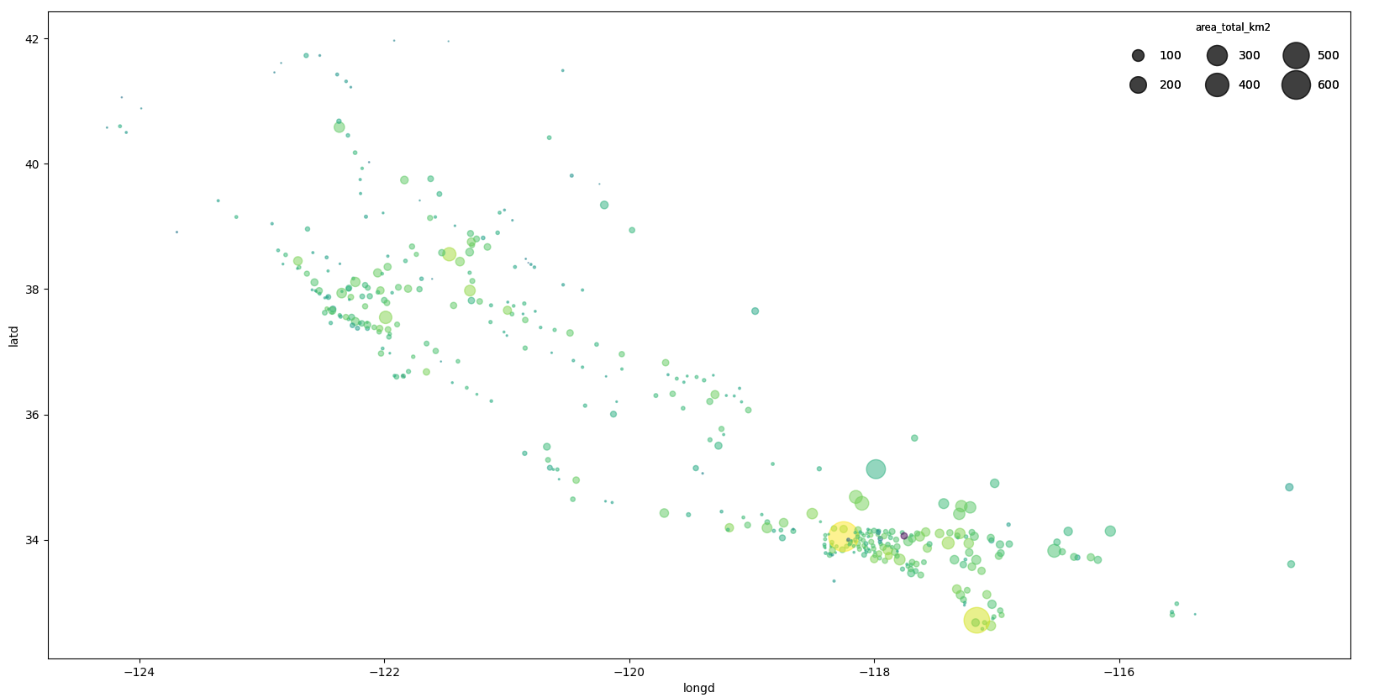

In [124]:
df_cities["log_population_total"] = np.log10(df_cities["population_total"])
df_cities[["population_total", "log_population_total"]].sample(5)

,population_total,log_population_total
213,57065,4.756370
265,1443,3.159266
420,5814,3.764475
89,122067,5.086598
19,28310,4.451940


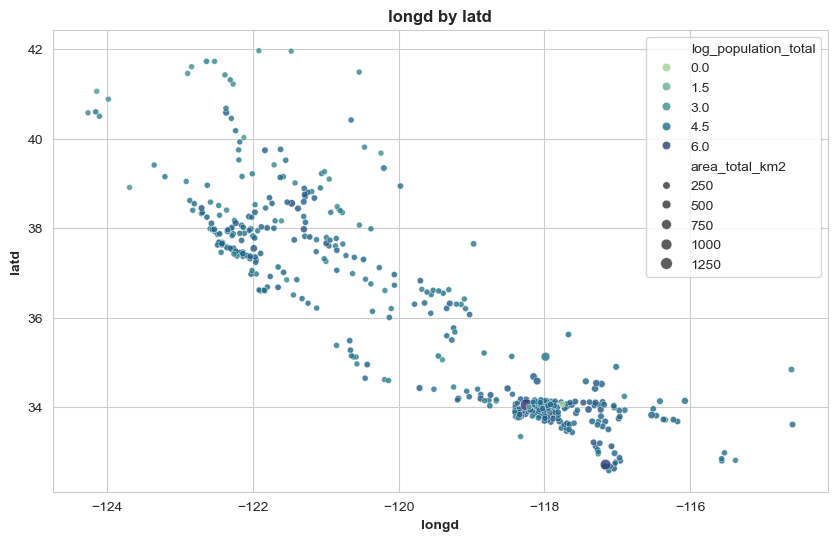

In [125]:
create_scatter_chart(df_cities,
					 x="longd",
					 y="latd",
					 data_point_size="area_total_km2",
					 category_column="log_population_total")

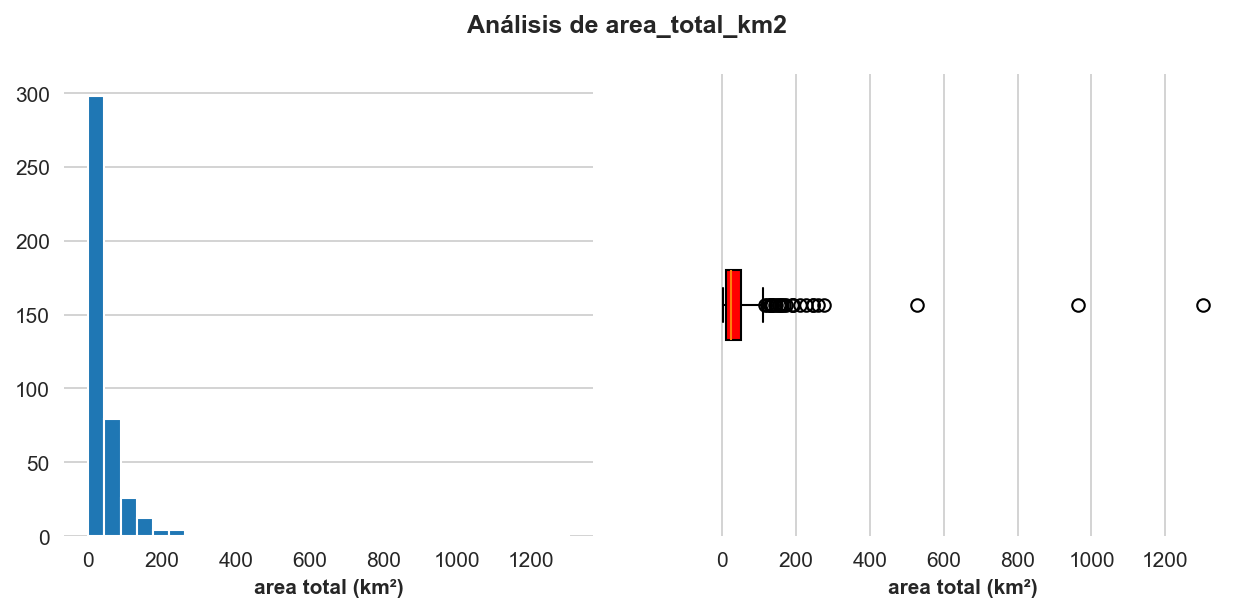

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=1, dpi=150, figsize=(10,4))
fig.suptitle("Análisis de area_total_km2",
			 fontsize=12,
			 fontweight="bold")
ax[0].hist(x="area_total_km2",
		   data=df_cities,
		   bins=30)
ax[0].set_xlabel(f"area total (km²)", fontsize=10, fontweight="bold")
ax[0].spines["left"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].spines["bottom"].set_visible(False)
ax[0].grid(axis="x")

ax[1].boxplot(x="area_total_km2",
			  data=df_cities,
			  boxprops={ "facecolor": "red" },
			  patch_artist=True,
			  orientation="horizontal")
ax[1].set_xlabel(f"area total (km²)", fontsize=10, fontweight="bold")
ax[1].set_yticks([])
ax[1].spines["left"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
ax[1].spines["bottom"].set_visible(False)
plt.show()

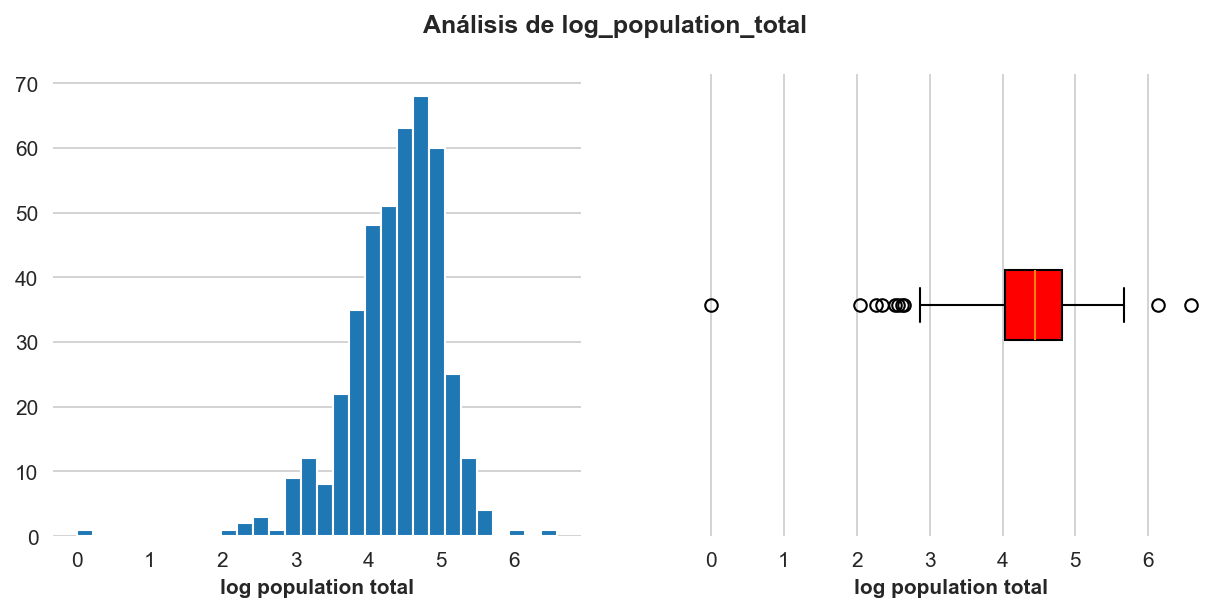

In [131]:
fig, ax = plt.subplots(ncols=2, nrows=1, dpi=150, figsize=(10,4))
fig.suptitle("Análisis de log_population_total",
			 fontsize=12,
			 fontweight="bold")
ax[0].hist(x="log_population_total", data=df_cities, bins=30)
ax[0].set_xlabel(f"log population total", fontsize=10, fontweight="bold")
ax[0].spines["left"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].spines["bottom"].set_visible(False)
ax[0].grid(axis="x")

ax[1].boxplot(x="log_population_total",
			  data=df_cities,
			  boxprops={ "facecolor": "red" },
			  patch_artist=True,
			  orientation="horizontal")
ax[1].set_xlabel(f"log population total", fontsize=10, fontweight="bold")
ax[1].set_yticks([])
ax[1].spines["left"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
ax[1].spines["bottom"].set_visible(False)
plt.show()

## Presentación

En esta parte tendrás que hacer dos cosas:

### 2.1
Crear una presentación sencilla sobre el Titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:

> 1. El titanic fue un accidente con una tasa de mortalidad alta.
> 2. Los datos apoyan que se dio el "Las mujeres y los niños primero", pero...
> 3. ...la clase en la que viajases tuvo una influencia significativa y podría explicar...
> 4. ...las diferencias entre tasas de supervivencia de mujeres y niños.
> 5. Además, aunque el puerto de embarque parece tener influencia, se podría asumir que más bien fue la clase de pasaje que embarcó en cada uno de ellos.


### 2.2
Las gráficas a emplear en la presentación debes generarlas en un notebook.


**Tienes que entregar ambas cosas: presentación y notebook :)**

In [90]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
91,0,3,male,20.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True
733,0,2,male,23.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
729,0,3,female,25.0,1,0,7.9250,S,Third,woman,False,NaN,Southampton,no,False
814,0,3,male,30.5,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
734,0,2,male,23.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True


#### Transformaciones

In [3]:
df_titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [91]:
df_titanic.drop(columns=["deck", "embarked"], inplace=True)

Rellenamos la columna `embark_town` con la moda.

In [92]:
mode = df_titanic["embark_town"].mode()[0]
print("La moda de EMBARK_TOWN es", mode)

La moda de EMBARK_TOWN es Southampton


In [93]:
is_nan = df_titanic["embark_town"].isna()
imputations = df_titanic.loc[is_nan, "embark_town"].apply(lambda x: mode)

df_titanic.fillna(value={"embark_town": imputations}, inplace=True)
df_titanic.loc[is_nan]

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,First,woman,False,Southampton,yes,True
829,1,1,female,62.0,0,0,80.0,First,woman,False,Southampton,yes,True


Rellenamos la columna `age`.

In [94]:
median = df_titanic.groupby("who")["age"].median()

print("La mediana de AGE según WHO es:")
for i, k in enumerate(median):
	print(f"\t{median.index[i].upper()}: {k} años")

La mediana de AGE según WHO es:
	CHILD: 5.0 años
	MAN: 30.0 años
	WOMAN: 30.0 años


In [95]:
is_woman = df_titanic["who"] == "woman"
age_is_nan = df_titanic["age"].isna()
mask = is_woman & age_is_nan

imputations = df_titanic.loc[mask, "age"].apply(lambda x: median["woman"])
df_titanic.fillna(value={"age": imputations}, inplace=True)
df_titanic.sample(2)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
202,0,3,male,34.0,0,0,6.4958,Third,man,True,Southampton,no,True
586,0,2,male,47.0,0,0,15.0000,Second,man,True,Southampton,no,True


In [96]:
is_man = df_titanic["who"] == "man"
age_is_nan = df_titanic["age"].isna()
mask = is_man & age_is_nan

imputations = df_titanic.loc[mask, "age"].apply(lambda x: median["man"])
df_titanic.fillna(value={"age": imputations}, inplace=True)
df_titanic.sample(2)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
46,0,3,male,30.0,1,0,15.5,Third,man,True,Queenstown,no,False
815,0,1,male,30.0,0,0,0.0,First,man,True,Southampton,no,True


In [97]:
df_titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

#### Charts

##### El titanic fue un accidente con una tasa de mortalidad alta

In [484]:
def format_autopct(values):
	def autopct(pct):
		total = sum(values)
		value = int(round(pct*total/100.0))

		return f"{pct:.1f}%\n({value:d} tripulantes)"

	return autopct

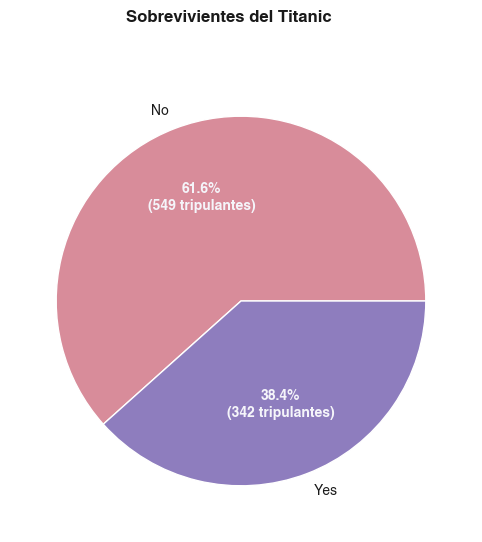

In [483]:
data = df_titanic["alive"].value_counts()

fig, ax = plt.subplots(dpi=100, figsize=(10, 6))
font_config = {
	"family": "Helvetica",
	"size": "large",
	"weight": "bold"
}
fig.suptitle("Sobrevivientes del Titanic",
			 color="#191919",
			 fontproperties=font_config)
ax.set_aspect(aspect="equal")

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = ax.pie(x=data.values,
							  labels=data.index.str.capitalize(),
							  data=data,
							  autopct=format_autopct(data.values),
							  colors=["#D88C9A", "#8E7DBE"],
							  textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)

title = "Sobrevivientes del Titanic"
fig.savefig("./" + title, transparent=True)
plt.show()

##### Los datos apoyan que se dio el _"Las mujeres y los niños primero"_

In [485]:
data = df_titanic.groupby(by=["who"])["alive"].value_counts().unstack()
for index in data.index:
	rate = round(data.loc[index, "yes"]/data.loc[index].sum() * 100, 1)
	data.loc[index, "rate"] = rate

data.sort_values("rate", ascending=False, inplace=True)
data

alive,no,yes,rate
who,,,
woman,66,205,75.6
child,34,49,59.0
man,449,88,16.4


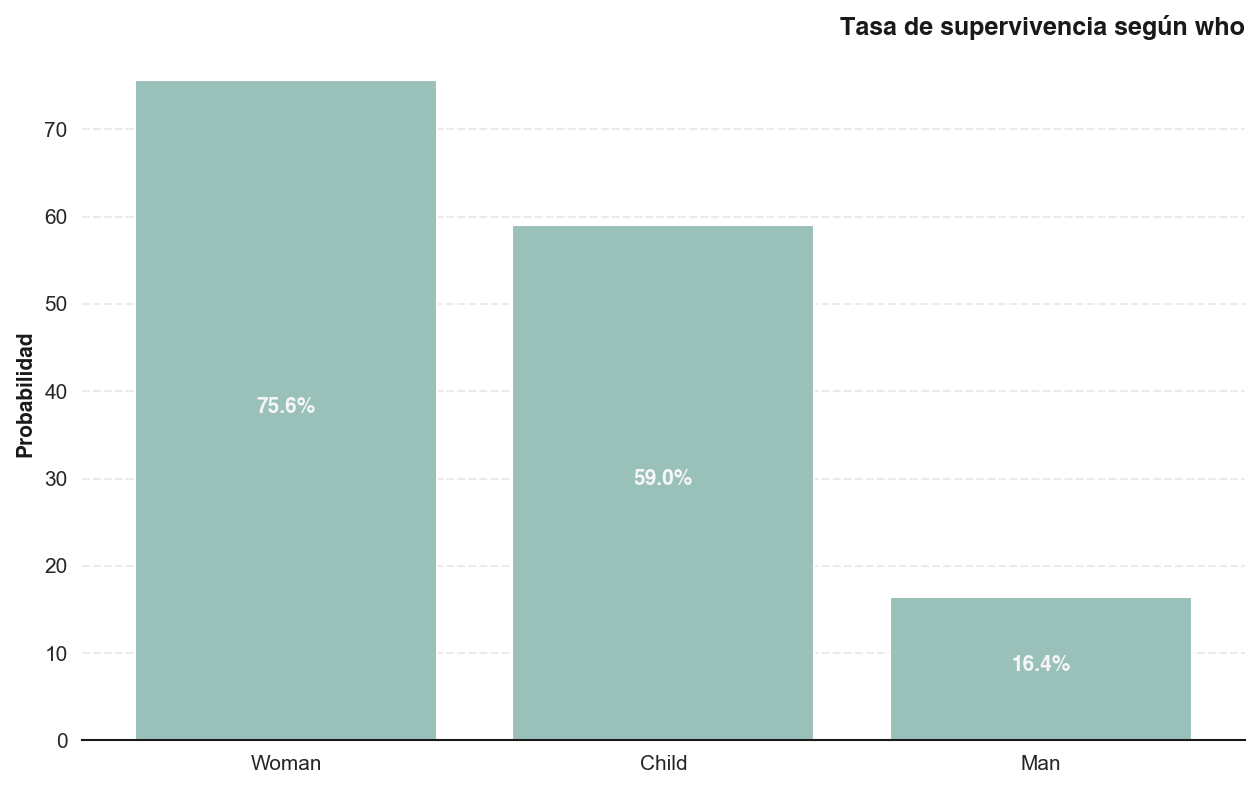

In [486]:
fig, ax = plt.subplots(dpi=150, figsize=(10, 6))

font_config = {
	"color": "#191919",
	"family": "Helvetica",
	"size": "large",
	"weight": "bold"
}
ax.set_title("Tasa de supervivencia según who",
			 fontdict=font_config,
			 loc="right")


rects = ax.bar(x=data.index.str.capitalize(),
			   height="rate",
			   data=data,
			   facecolor="#99C1B9")


font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax.bar_label(rects,
			 padding=1.5,
			 label_type="center",
			 fmt="%1.1f%%",
			 color="#F5F5FA",
			 font_properties=font_config)
#ax.set_xlabel("who", color="#191919", fontdict=font_config)
ax.set_ylabel("Probabilidad", color="#191919", fontdict=font_config)
ax.grid(axis="x", visible=False)
ax.grid(axis="y",
		alpha=0.8,
		color="#E5E7EB",
		linestyle="dashed",
		linewidth=1,
		visible=True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["bottom"].set_color("#191919")
ax.spines[["left", "top", "right"]].set_visible(False)

title = "Tasa de supervivencia según WHO"
fig.savefig("./" + title, transparent=True)
plt.show()

##### ...la clase en la que viajases tuvo una influencia significativa y podría explicar

In [487]:
data = df_titanic.groupby(by=["class"])["alive"].value_counts().unstack()
for index in data.index:
	rate = round(data.loc[index, "yes"]/data.loc[index].sum() * 100, 2)
	data.loc[index, "rate"] = rate

data.sort_values("rate", ascending=False, inplace=True)
data

alive,no,yes,rate
class,,,
First,80,136,62.96
Second,97,87,47.28
Third,372,119,24.24


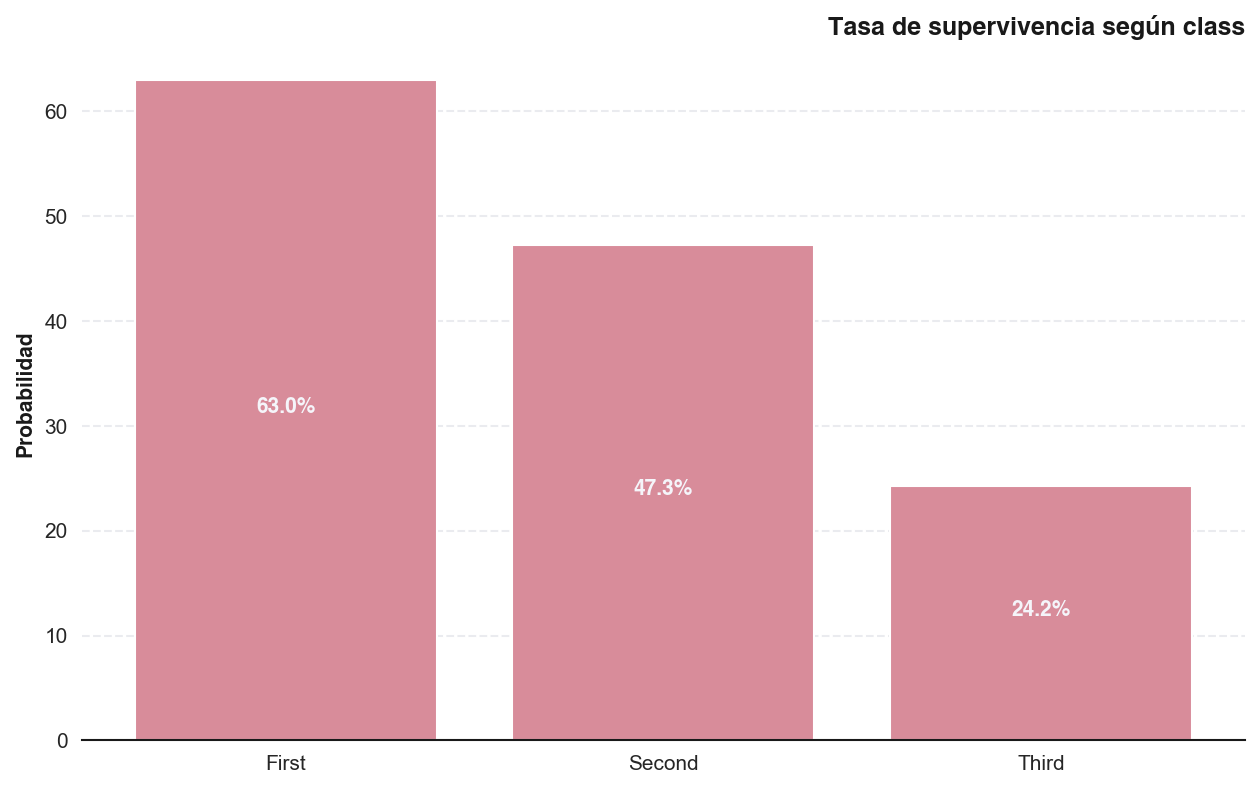

In [488]:
fig, ax = plt.subplots(dpi=150, figsize=(10, 6))

font_config = {
	"color": "#191919",
	"family": "Helvetica",
	"size": "large",
	"weight": "bold"
}
ax.set_title("Tasa de supervivencia según class",
			 fontdict=font_config,
			 loc="right")


rects = ax.bar(x=data.index.str.capitalize(),
			   height="rate",
			   data=data,
			   facecolor="#D88C9A")


font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax.bar_label(rects,
			 padding=1.5,
			 label_type="center",
			 fmt="%1.1f%%",
			 color= "#F5F5FA",
			 font_properties=font_config)


#ax.set_xlabel("who", color="#191919", fontdict=font_config)
ax.set_ylabel("Probabilidad", color="#191919", fontdict=font_config)
ax.grid(axis="x", visible=False)
ax.grid(axis="y",
		alpha=0.8,
		color="#E5E7EB",
		linestyle="dashed",
		linewidth=1,
		visible=True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["bottom"].set_color("#191919")
ax.spines[["left", "top", "right"]].set_visible(False)

title = "Tasa de supervivencia según CLASS"
fig.savefig("./" + title, transparent=True)
plt.show()

##### **...las diferencias entre tasas de supervivencia de mujeres y niños**

In [489]:
expr = "who == 'woman' | who == 'child'"
data = df_titanic.query(expr)
data = data.groupby(by=["who", "class", "alive"]).size().unstack().fillna(0)
data

alive           no   yes
who   class             
child First    1.0   5.0
      Second   0.0  19.0
      Third   33.0  25.0
woman First    2.0  89.0
      Second   6.0  60.0
      Third   58.0  56.0

In [490]:
for index in data.index:
	total = data.loc[index].sum()
	rate = round(data.loc[index]["yes"]/total, 2) * 100
	data.loc[index, "rate"] = rate

data

alive           no   yes   rate
who   class                    
child First    1.0   5.0   83.0
      Second   0.0  19.0  100.0
      Third   33.0  25.0   43.0
woman First    2.0  89.0   98.0
      Second   6.0  60.0   91.0
      Third   58.0  56.0   49.0

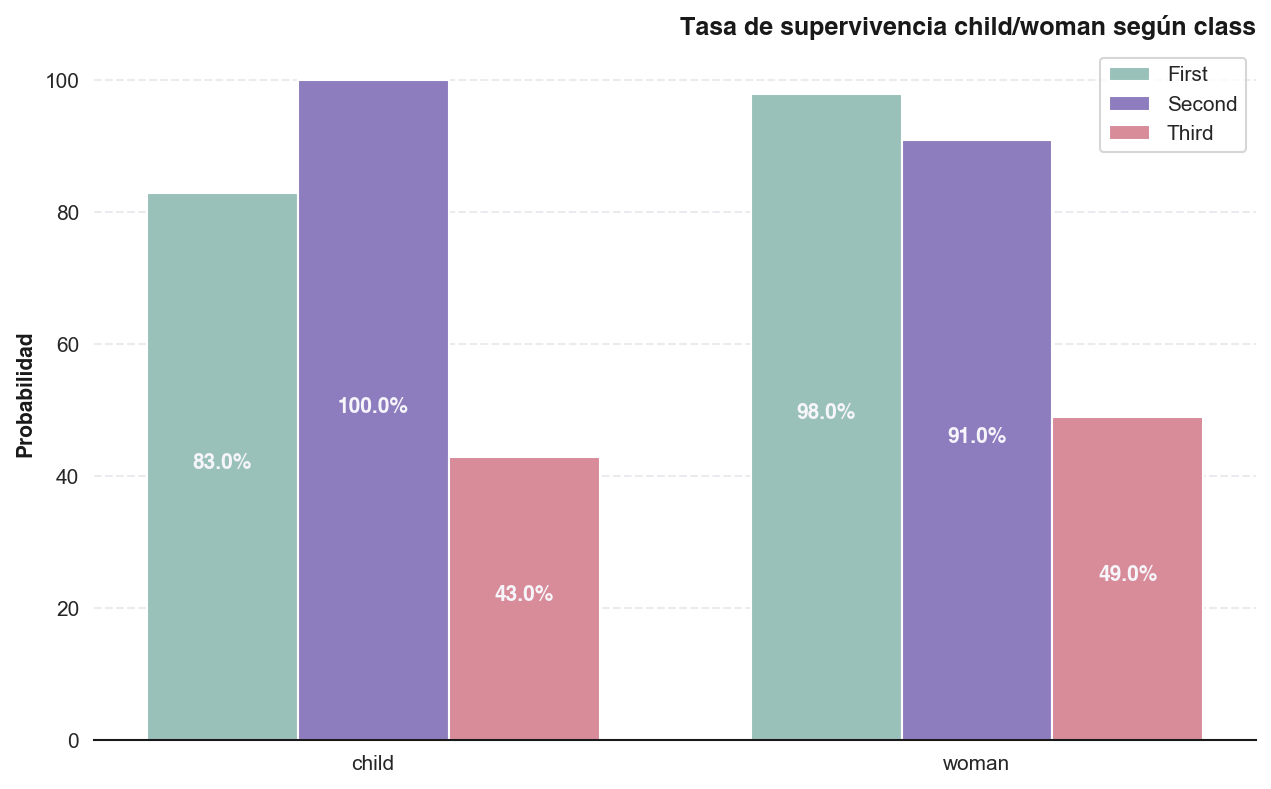

In [491]:
idx = pd.IndexSlice

colors = [ "#99C1B9", "#8E7DBE", "#D88C9A"]

fig, ax = plt.subplots(dpi=150, figsize=(10, 6))
font_config = {
	"color": "#191919",
	"family": "Helvetica",
	"size": "large",
	"weight": "bold"
}
ax.set_title("Tasa de supervivencia child/woman según class",
			 fontdict=font_config,
			 loc="right")

who = data.index.get_level_values("who").unique()
classes = data.index.get_level_values("class").unique()
x = np.arange(len(who))

width = 0.25
for index, label in enumerate(classes):
	offset = width * index
	to_plot = data.loc[idx[:, label], "rate"]
	rects = ax.bar(x=x + offset,
				   height=to_plot.values,
				   data=to_plot,
				   label=label,
				   facecolor=colors[index],
				   width=width)

	font_config = {
		"family": "Helvetica",
		"size": "medium",
		"weight": "bold"
	}
	ax.bar_label(rects,
				padding=1.5,
				label_type="center",
				fmt="%1.1f%%",
				color= "#F5F5FA",
				font_properties=font_config)

ax.set_xticks(ticks=x + width, labels=who)
#ax.set_xlabel("who", color="#191919", fontdict=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax.set_ylabel("Probabilidad", color="#191919", fontdict=font_config)
ax.grid(axis="x", visible=False)
ax.grid(axis="y",
		alpha=0.8,
		color="#E5E7EB",
		linestyle="dashed",
		linewidth=1,
		visible=True)

ax.spines["bottom"].set_linewidth(1)
ax.spines["bottom"].set_color("#191919")
ax.spines[["left", "top", "right"]].set_visible(False)
ax.legend(title_fontproperties=font_config,
		  frameon=True)

title = "Tasa de supervivencia CHILD-WOMAN según CLASS"
fig.savefig(f"./{title}", transparent=True)
plt.show()

##### **Además, aunque el puerto de embarque parece tener influencia, se podría asumir que más bien fue la clase de pasaje que embarcó en cada uno de ellos.**

In [496]:
data = df_titanic.groupby(by=["embark_town"])["alive"].value_counts().unstack()
for index in data.index:
	data.loc[index, "total"] = data.loc[index, :].sum()

data["rate"] = round(data["yes"]/data["total"], 2) * 100
data

alive,no,yes,total,rate
embark_town,,,,
Cherbourg,75,93,168.0,55.0
Queenstown,47,30,77.0,39.0
Southampton,427,219,646.0,34.0


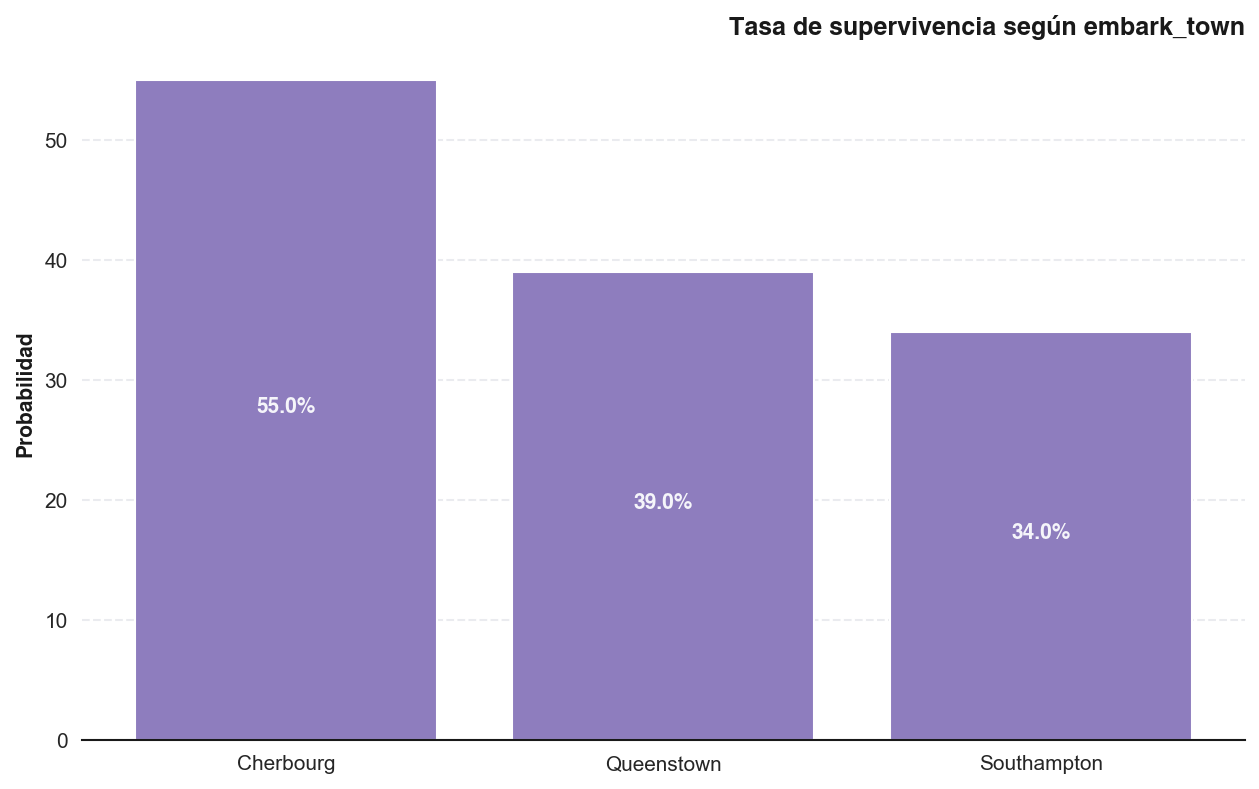

In [497]:
fig, ax = plt.subplots(dpi=150, figsize=(10, 6))

font_config = {
	"color": "#191919",
	"family": "Helvetica",
	"size": "large",
	"weight": "bold"
}
ax.set_title("Tasa de supervivencia según embark_town",
			 fontdict=font_config,
			 loc="right")


rects = ax.bar(x=data.index.str.capitalize(),
			   height="rate",
			   data=data,
			   facecolor="#8E7DBE")


font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax.bar_label(rects,
			 padding=1.5,
			 label_type="center",
			 fmt="%1.1f%%",
			 color="#F5F5FA",
			 font_properties=font_config)

ax.set_ylabel("Probabilidad", color="#191919", fontdict=font_config)
ax.grid(axis="x", visible=False)
ax.grid(axis="y",
		alpha=0.8,
		color="#E5E7EB",
		linestyle="dashed",
		linewidth=1,
		visible=True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["bottom"].set_color("#191919")
ax.spines[["left", "top", "right"]].set_visible(False)

title = "Tasa de supervivencia según EMBARK_TOWN"
fig.savefig(f"./{title}", transparent=True)
plt.show()

In [494]:
data = df_titanic.groupby(by=["embark_town", "class"])["class"].size().unstack()
data = data.astype(float)

for label in data.index:
	total = data.loc[label].sum()
	data.loc[label] = (data.loc[label].values/total * 100)

data

class,First,Second,Third
embark_town,,,
Cherbourg,50.595238,10.119048,39.285714
Queenstown,2.597403,3.896104,93.506494
Southampton,19.969040,25.386997,54.643963


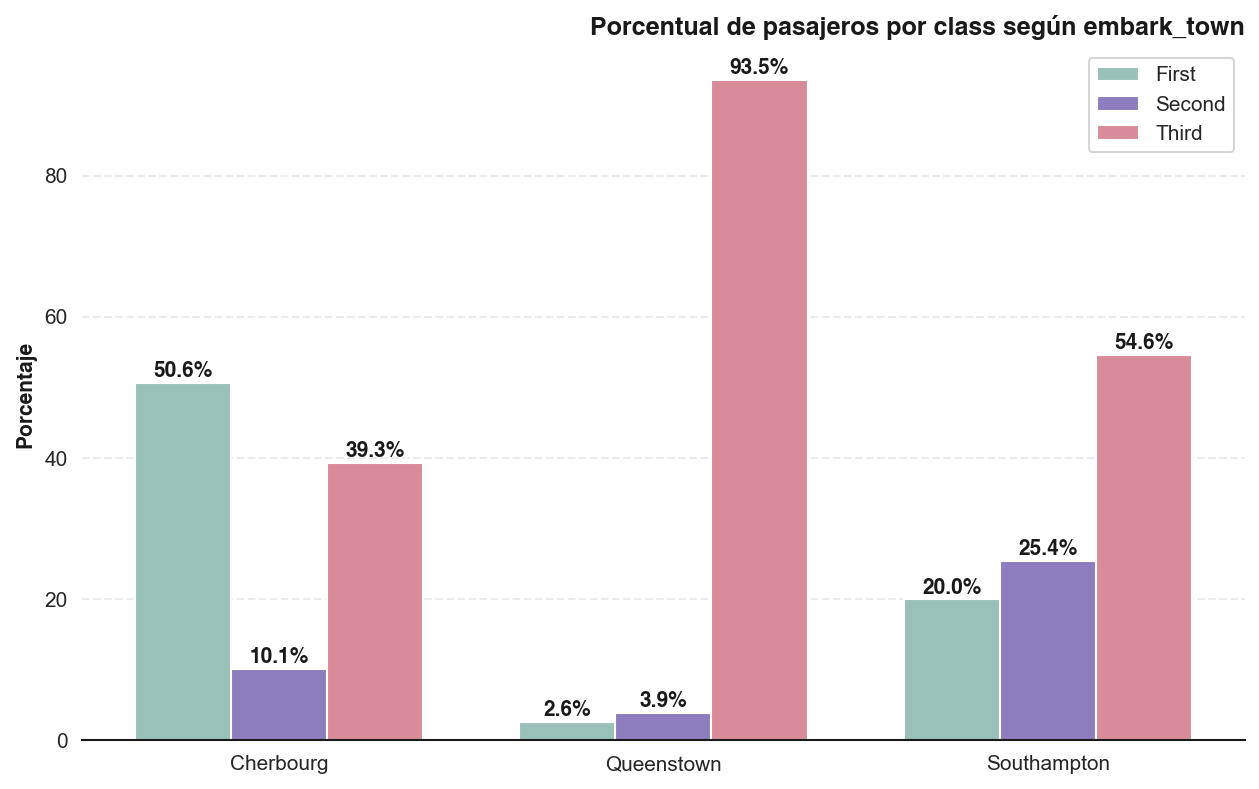

In [495]:
idx = pd.IndexSlice

colors = [ "#99C1B9", "#8E7DBE", "#D88C9A"]

fig, ax = plt.subplots(dpi=150, figsize=(10, 6))
font_config = {
	"color": "#191919",
	"family": "Helvetica",
	"size": "large",
	"weight": "bold"
}
ax.set_title("Porcentual de pasajeros por class según embark_town",
			 fontdict=font_config,
			 loc="right")

embark_town = np.arange(len(data.index))

width = 0.25
for index, label in enumerate(data.columns):
	offset = width * index
	to_plot = data.loc[:, label]
	rects = ax.bar(x=embark_town + offset,
				   height=to_plot.values,
				   data=to_plot,
				   label=label,
				   facecolor=colors[index],
				   width=width)

	font_config = {
		"family": "Helvetica",
		"size": "medium",
		"weight": "bold"
	}
	ax.bar_label(rects,
				padding=0.5,
				label_type="edge",
				fmt="%1.1f%%",
				color= "#191919",
				font_properties=font_config)

ax.set_xticks(ticks=embark_town + width, labels=data.index.values)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax.set_ylabel("Porcentaje", color="#191919", fontdict=font_config)
ax.grid(axis="x", visible=False)
ax.grid(axis="y",
		alpha=0.8,
		color="#E5E7EB",
		linestyle="dashed",
		linewidth=1,
		visible=True)

ax.spines["bottom"].set_linewidth(1)
ax.spines["bottom"].set_color("#191919")
ax.spines[["left", "top", "right"]].set_visible(False)
ax.legend(title_fontproperties=font_config,
		  frameon=True)

title = "Porcentual de pasajeros por CLASS según EMBARK_TOWN"
fig.savefig(f"./{title}", transparent=True)
plt.show()

Actúa como un experto diseñador gráfico.
El contexto es una presentación de EDA sobre el dataset del Titanic, basada en las gráficas proporcionadas.

Objetivo: crear una presentación de máximo 6 diapositivas que explique los hallazgos más relevantes del análisis exploratorio.
Las gráficas tienen los siguientes titulos:
-Porcentual de pasajeros por class según embark_town
-Sobrevivientes del Titanic
-Tasa de supervivencia CHILD-WOMAN según CLASS
-Tasa de supervivencia según CLASS
-Tasa de supervivencia según EMBARK_TOWN
-Tasa de supervivencia según EMBARK_TOWN
-Tasa de supervivencia según WHO

Incluye imagenes de epoca, pasajes, ciudades fotos de las ciudades donde embarco el titanic
El fondo debe ser con tonos claros